<a href="https://colab.research.google.com/github/Gail529/chess_ML/blob/main/bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install category_encoders

     |████████████████████████████████| 81kB 4.1MB/s 


In [51]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import warnings
import category_encoders as ce
from category_encoders.hashing import HashingEncoder
from category_encoders.binary import BinaryEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV


In [20]:
data=pd.read_csv('/content/games.csv',usecols=['rated','turns','victory_status','winner','white_rating','black_rating','opening_ply','opening_eco','increment_code'])
data.head()

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply
0,False,13,outoftime,white,15+2,1500,1191,D10,5
1,True,16,resign,black,5+10,1322,1261,B00,4
2,True,61,mate,white,5+10,1496,1500,C20,3
3,True,61,mate,white,20+0,1439,1454,D02,3
4,True,95,mate,white,30+3,1523,1469,C41,5


In [21]:
data['rating_diff'] = data['white_rating']-data['black_rating']
data.columns


Index(['rated', 'turns', 'victory_status', 'winner', 'increment_code',
       'white_rating', 'black_rating', 'opening_eco', 'opening_ply',
       'rating_diff'],
      dtype='object')

In [22]:
from sklearn import preprocessing 
cols=['turns','white_rating', 'black_rating', 'opening_ply','rating_diff']
cols_to_scale=data[cols]
Standardisation = preprocessing.StandardScaler()  
scaled_cols= Standardisation.fit_transform(cols_to_scale) 
print ("\nStandardised columns : \n", scaled_cols) 


Standardised columns : 
 [[-1.4139516  -0.33178766 -1.36698461  0.0654322   1.20949108]
 [-1.32458542 -0.94295461 -1.12645864 -0.29208323  0.21362897]
 [ 0.01590722 -0.34552175 -0.30523428 -0.64959865 -0.04738328]
 ...
 [-0.75859964 -1.2966074  -1.04055651 -0.64959865 -0.30036438]
 [ 1.44576604 -0.81248077 -1.24328554 -0.29208323  0.50275023]
 [ 0.52231555 -1.24167104 -0.858444   -0.64959865 -0.44894059]]


In [23]:
data[cols]=scaled_cols
data

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply,rating_diff
0,False,-1.413952,outoftime,white,15+2,-0.331788,-1.366985,D10,0.065432,1.209491
1,True,-1.324585,resign,black,5+10,-0.942955,-1.126459,B00,-0.292083,0.213629
2,True,0.015907,mate,white,5+10,-0.345522,-0.305234,C20,-0.649599,-0.047383
3,True,0.015907,mate,white,20+0,-0.541233,-0.463294,D02,-0.649599,-0.091555
4,True,1.028724,mate,white,30+3,-0.252817,-0.411753,C41,0.065432,0.185520
...,...,...,...,...,...,...,...,...,...,...
20053,True,-1.086276,resign,white,10+10,0.324015,-1.267338,A80,-1.007114,1.860014
20054,True,0.641470,mate,black,10+0,-1.248538,-1.349804,A41,-1.007114,0.117255
20055,True,-0.758600,mate,white,10+0,-1.296607,-1.040557,D00,-0.649599,-0.300364
20056,True,1.445766,resign,white,10+0,-0.812481,-1.243286,B07,-0.292083,0.502750


In [24]:
# label encoding the data 
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()
print(categorical_cols)
le = LabelEncoder() 
data['winner']= le.fit_transform(data['winner'])
data['rated']= le.fit_transform(data['rated'])
data['victory_status']= le.fit_transform(data['rated'])

#for categorical_cols with high cardinality
encoder= ce.BinaryEncoder(cols=['increment_code','opening_eco'])
data_encoded=encoder.fit_transform(data) 
data_encoded

['victory_status', 'winner', 'increment_code', 'opening_eco']


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,rated,turns,victory_status,winner,increment_code_0,increment_code_1,increment_code_2,increment_code_3,increment_code_4,increment_code_5,increment_code_6,increment_code_7,increment_code_8,increment_code_9,white_rating,black_rating,opening_eco_0,opening_eco_1,opening_eco_2,opening_eco_3,opening_eco_4,opening_eco_5,opening_eco_6,opening_eco_7,opening_eco_8,opening_eco_9,opening_ply,rating_diff
0,0,-1.413952,0,2,0,0,0,0,0,0,0,0,0,1,-0.331788,-1.366985,0,0,0,0,0,0,0,0,0,1,0.065432,1.209491
1,1,-1.324585,1,0,0,0,0,0,0,0,0,0,1,0,-0.942955,-1.126459,0,0,0,0,0,0,0,0,1,0,-0.292083,0.213629
2,1,0.015907,1,2,0,0,0,0,0,0,0,0,1,0,-0.345522,-0.305234,0,0,0,0,0,0,0,0,1,1,-0.649599,-0.047383
3,1,0.015907,1,2,0,0,0,0,0,0,0,0,1,1,-0.541233,-0.463294,0,0,0,0,0,0,0,1,0,0,-0.649599,-0.091555
4,1,1.028724,1,2,0,0,0,0,0,0,0,1,0,0,-0.252817,-0.411753,0,0,0,0,0,0,0,1,0,1,0.065432,0.185520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,1,-1.086276,1,2,0,0,0,0,0,1,0,0,0,0,0.324015,-1.267338,0,0,0,0,1,0,0,0,0,0,-1.007114,1.860014
20054,1,0.641470,1,0,0,0,0,0,0,0,0,1,0,1,-1.248538,-1.349804,0,0,0,0,1,0,0,1,1,0,-1.007114,0.117255
20055,1,-0.758600,1,2,0,0,0,0,0,0,0,1,0,1,-1.296607,-1.040557,0,0,0,0,0,0,0,1,1,1,-0.649599,-0.300364
20056,1,1.445766,1,2,0,0,0,0,0,0,0,1,0,1,-0.812481,-1.243286,0,0,0,1,0,1,1,0,1,0,-0.292083,0.502750


In [27]:
data=data_encoded

In [28]:
x=data.iloc[:,0:27]
y=data['winner']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)


In [60]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3,criterion='gini')
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [49]:
max_depth = [1,2,3,4,5,6,7,8,9,10]
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for val in max_depth:
    score = cross_val_score(DecisionTreeClassifier(max_depth= val, random_state= 42), x, y, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(1): 0.953
Average score(2): 1.000
Average score(3): 1.000
Average score(4): 1.000
Average score(5): 1.000
Average score(6): 1.000
Average score(7): 1.000
Average score(8): 1.000
Average score(9): 1.000
Average score(10): 1.000


In [59]:
dtc = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}
cross_validation = StratifiedKFold(n_folds=2)

grid_search = GridSearchCV(dct, param_grid=parameter_grid, cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

dtc = grid_search.best_estimator_
dtc


TypeError: ignored

In [56]:
import numpy as np
def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

dtree_grid_search(x,y,10)

{'criterion': 'gini', 'max_depth': 3}

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1816
           1       1.00      1.00      1.00       192
           2       1.00      1.00      1.00      2004

    accuracy                           1.00      4012
   macro avg       1.00      1.00      1.00      4012
weighted avg       1.00      1.00      1.00      4012



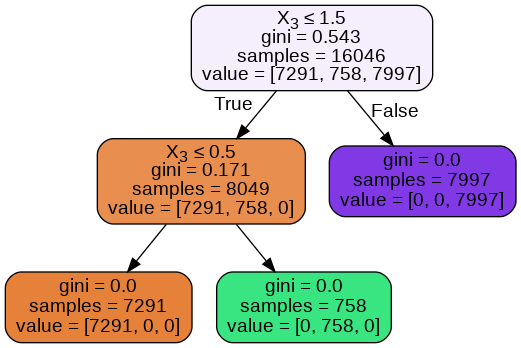

In [39]:

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('chess.png')
Image(graph.create_png())

In [33]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1816
           1       1.00      1.00      1.00       192
           2       1.00      1.00      1.00      2004

    accuracy                           1.00      4012
   macro avg       1.00      1.00      1.00      4012
weighted avg       1.00      1.00      1.00      4012



In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)